# Random Forest

Based on **Patric Loeber** video: https://www.youtube.com/watch?v=Oq1cKjR8hNo

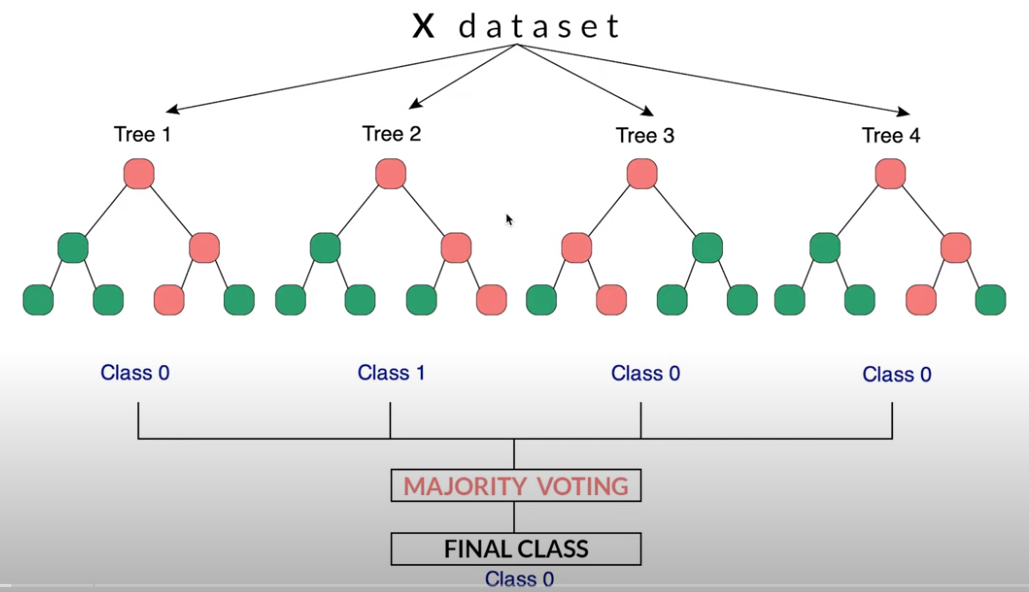

### Notes

The random forest algorithm is one of the most powerful and most popular algorithms.

If we have a look at image above then this shows the whole idea. The idea is to combine multiple trees into a forest. So we train multiple trees and each tree gets a random subset of the training data thus the word random. Then we make a predictin with each of the trees  at the end and we make a majority vote to get the final prediction.

The random forest has some advantages compared to only one tree for example by building more trees we have more chances to get the correct prediction and we also reduce the chance of overfitting with a single tree. Typically the accuracy of a random forest is higher than with a single tree and that's why it's so powerful.

In [21]:
import numpy as np
from DecisionTree import DecisionTree
from collections import Counter

def bootstrap_sample(X, y):
    n_samples = X.shape[0]
    idxs = np.random.choice(n_samples, size=n_samples, replace=True)
    return X[idxs], y[idxs]

def most_common_label(y):
    counter = Counter(y)
    # returns list of tuples,
    # we want to have first element of the list
    # and from the first tuple we want the first element
    most_common = counter.most_common(1)[0][0]
    return most_common

class RandomForest:
    
    def __init__(self, n_trees=100, min_samples_split=2, max_depth=100, n_feats=None):
        self.n_trees = n_trees
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.trees = []
        
    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(min_samples_split=self.min_samples_split,
                max_depth=self.max_depth, n_feats=self.n_feats)
            X_sample, y_sample = bootstrap_sample(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)
        
    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        # [1111 0000 1111] -> what we get
        # [101 101 101 101] -> what we want
        tree_preds = np.swapaxes(tree_preds, 0, 1)
        y_pred = [most_common_label(tree_pred) for tree_pred in tree_preds]
        return np.array(y_pred)

In [22]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

data = datasets.load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

clf = RandomForest(n_trees=3)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc = accuracy(y_test, y_pred)

print("Accuracy:", acc)

Accuracy: 0.9035087719298246
